In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x108ca7b10>
Populating the interactive namespace from numpy and matplotlib


### Part 1

In [95]:
def load_array(fn):
    return np.array(
        np.loadtxt(fn,comments='fold along',delimiter=','),
        dtype='int32')

In [125]:
def fold(fn,instructions):
    array = load_array(fn)
    sheet = np.zeros((max(array[:,1])+1,max(array[:,0])+1))
    for row,col in array:
        sheet[col][row]=1
    #display(sheet)
    for inst in instructions.split('\n'):
        direction,k=inst[11:].split('=')
        k = int(k)
        #print(np.shape(sheet))
        #print(direction,k)
        if direction == 'y':
            upper = sheet[:k,:]
            lower = np.flipud(sheet[k+1:,:])
            upper[-k:,:]+=lower
            sheet = upper
        elif direction == 'x':
            left = sheet[:,:k]
            right = np.fliplr(sheet[:,k+1:])
            left[:,-k:]+=right
            sheet = left
        #display(sheet)
    return sheet

In [126]:
fn = 'd13p1_test.txt'
folded = fold(fn,"""fold along y=7""")
assert len(np.where(folded!=0)[0])==17
print('')
folded = fold(fn,"""fold along y=7\nfold along x=5""")
assert len(np.where(folded!=0)[0])==16

In [127]:
fn = 'd13p1.txt'
folded = fold(fn,"""fold along x=655""")
print(f'The answer is {len(np.where(folded!=0)[0])}')

The answer is 743


### Part 2

/var/folders/pm/szdr5c1j3vz19xvrxpps_wfc0000gn/T/ipykernel_12142/2049913438.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(folded))


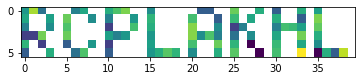

In [136]:
instructions = """fold along x=655
fold along y=447
fold along x=327
fold along y=223
fold along x=163
fold along y=111
fold along x=81
fold along y=55
fold along x=40
fold along y=27
fold along y=13
fold along y=6"""

folded = fold(fn,instructions)
plt.imshow(np.log10(folded))